In [3]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

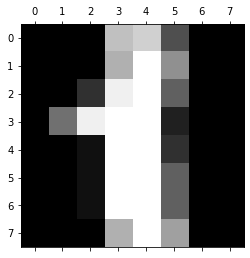

In [5]:
plt.gray()
plt.matshow(digits.images[1])

In [8]:
df = pd.DataFrame(digits.data)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0


In [12]:
df['target'] = digits.target 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [13]:
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(df.target, axis = 1), digits.target, test_size = 0.2)

In [17]:
len(X_train)

1437

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [19]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [21]:
model.score(X_test, Y_test)

0.9916666666666667

In [24]:
y_predicted = model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 35]], dtype=int64)

# 13[K Fold Cross Validation]

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

In [41]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9481481481481482

In [42]:
svm = SVC()
svm.fit(X_train, Y_train)
svm.score(X_test, Y_test)

0.9907407407407407

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

0.9833333333333333

In [56]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
kf

KFold(n_splits=4, random_state=None, shuffle=False)

In [57]:
for train_index, test_index in kf.split([1, 2, 3, 4, 5, 6, 7, 8, 9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 5 6 7 8] [3 4]
[0 1 2 3 4 7 8] [5 6]
[0 1 2 3 4 5 6] [7 8]


In [59]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train,y_train)
    return model.score(x_test, y_test)

In [60]:
get_score(LogisticRegression(), X_train, X_test, Y_train, Y_test)

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9481481481481482

In [62]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 3)

In [63]:
scores_lr = []
scores_svm = []
scores_rf = []

In [82]:
for train_index, test_index in kf.split(digits.data):
    X_train, X_test, Y_train, Y_test = digits.data[train_index], digits.data[test_index],\
    digits.target[train_index],digits.target[test_index]
    scores_lr.append((get_score(LogisticRegression(), X_train, X_test, Y_train, Y_test)))
    scores_svm.append((get_score(SVC(), X_train, X_test, Y_train, Y_test)))
    scores_rf.append((get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, Y_train, Y_test)))

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [83]:
scores_lr

[0.9355555555555556,
 0.9355555555555556,
 0.9153674832962138,
 0.9510022271714922,
 0.9175946547884187,
 0.9355555555555556,
 0.9153674832962138,
 0.9510022271714922,
 0.9175946547884187]

In [84]:
scores_svm

[0.9644444444444444,
 0.9665924276169265,
 0.9821826280623608,
 0.9487750556792873,
 0.9644444444444444,
 0.9665924276169265,
 0.9821826280623608,
 0.9487750556792873]

In [85]:
scores_rf

[0.9355555555555556,
 0.9153674832962138,
 0.9732739420935412,
 0.9265033407572383,
 0.9466666666666667,
 0.9153674832962138,
 0.9665924276169265,
 0.9287305122494433]

In [94]:
len(digits.data)

1797

In [86]:
from sklearn.model_selection import cross_val_score

In [104]:
cross_val_score(RandomForestClassifier(n_estimators=1100), digits.data, digits.target)

array([0.92777778, 0.91944444, 0.95821727, 0.96657382, 0.93036212])

In [89]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [101]:
cross_val_score(LogisticRegression(max_iter=5000), digits.data, digits.target)

array([0.925     , 0.87777778, 0.93871866, 0.93314763, 0.89693593])

# 14[K Means Clustering]

In [131]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
iris = load_iris()

In [144]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [145]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [146]:
new_df = df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

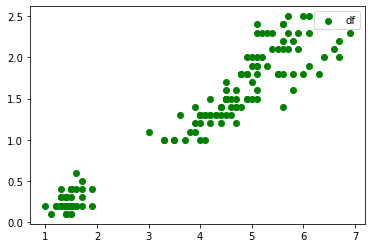

In [147]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],c = 'g', label = 'df')
plt.legend()

In [148]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [149]:
km = KMeans(n_clusters=3)
y_p = km.fit_predict(df)
y_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [150]:
df['cluster'] = y_p
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [151]:
df.cluster.unique()

array([1, 0, 2])

In [152]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

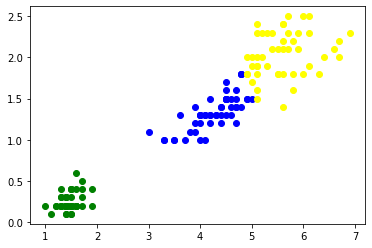

In [153]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

elbow plot

In [158]:
sse = [] #sum of squared error
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

In [160]:
sse

[650.7886666666667,
 186.27970291146764,
 31.371358974358966,
 22.64244363044362,
 14.19020586820587,
 11.412196969696973,
 9.298474003189792,
 7.808610729311969,
 6.850950742240214]

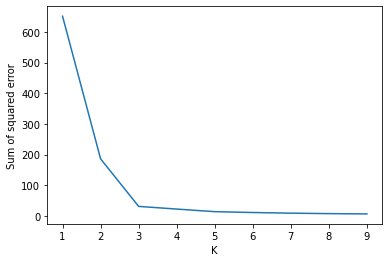

In [159]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# 15 & 16[Naive Bayes]

In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [202]:
df = pd.read_csv('spam_mails.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [203]:
df.groupby(df.Category).describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [204]:
df['spam'] = df['Category'].apply(lambda x :1 if x == 'spam' else 0 )
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(df['Message'], df['spam'], test_size = 0.3)
len(X_train)
print(X_train.values)

['Armand says get your ass over to epsilon'
 'Yes i think so. I am in office but my lap is in room i think thats on for the last few days. I didnt shut that down'
 'Save money on wedding lingerie at www.bridal.petticoatdreams.co.uk Choose from a superb selection with national delivery. Brought to you by WeddingFriend'
 ... 'What about this one then.'
 'hi my darlin im on my way to London and we have just been smashed into by another driver! and have a big dent! im really missing u what have u been up to? xxx'
 'Hey darlin.. i can pick u up at college if u tell me wen & where 2 mt.. love Pete xx']


In [206]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[20:33]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [207]:
X_test_count = v.transform(X_test.values)
X_test_count.toarray()[20:33]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [208]:
from sklearn.naive_bayes import MultinomialNB

In [209]:
mn = MultinomialNB()
mn.fit(X_train_count,Y_train)

MultinomialNB()

In [210]:
mn.score(X_test_count, Y_test)

0.9892344497607656

In [213]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [215]:
clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [216]:
clf.score(X_test,Y_test)

0.9892344497607656

In [217]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)

In [234]:
e = """Hey there, 
 
A brand-new edition of OnePlus Friday is here, and we are just dropping by to let you know all things great this Friday! 
 
This week, we are offering a cashback of up to 10% on purchases made through an American Express® Card. Head over to oneplus.in or the OnePlus Store App to avail the offer. Introducing on this OnePlus Friday, when you make a purchase of more than Rs. 4500 with American Express® Card, you get a free Red Cable Pro membership! Click here to know more about all that you can enjoy as a Red Cable Pro member. The offer is valid from 27th November to 29th November only!

Banner
There’s more coming your way. Winning is as easy as tapping a button this OnePlus Friday. All you must do is choose between two options, and if you end up on the majority side, you are a guaranteed winner. What’s more, if you are one of the 6 extra lucky ones, you stand a chance at winning either a pair of OnePlus Bullets Wireless Z Bass Edition or a OnePlus Power Bank. Get voting NOW

Never settle.""".lower()
e=[e.strip()]
e.append("""HURRY! Get 30% OFF* Viki Pass Standard Annual with code VP1120SA30 for your full year of early access to the hottest dramas of the season, AD-FREE!
 

*Valid only for the first year. Prices return to $49.99/year thereafter""")

In [235]:
clf.predict(e)

array([0, 1], dtype=int64)

In [236]:
mn.predict(emails_count)

array([0, 1], dtype=int64)

In [237]:
clf.predict(emails)

array([0, 1], dtype=int64)